### Lead Score case study

##### Importing Libaries

In [2917]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2918]:
#Reading leads csv file
df= pd.read_csv(r'Leads.csv',na_values=['Select'])

##### Analysing the data

In [2919]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2920]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

##### As columns name are length, Renaming the columns for easy access

In [2921]:
df =df.rename(columns={'Prospect ID':'ProspectID', 
                   'Lead Number':'LeadNumber', 
                   'Lead Origin':'LeadOrigin', 
                   'Lead Source':'LeadSource',
                   'Do Not Email':'DontMail',
                   'Do Not Call':'DontCall', #'Converted', 'TotalVisits',
                   'Total Time Spent on Website':'TotTimeSpentonWebsite', 
                   'Page Views Per Visit':'PageViewsPerVisit',
                   'Last Activity':'LastActivity',#'Country', 'Specialization', 
                   'How did you hear about X Education':'KnownXEducation_through',
                   'What is your current occupation':'CurrentOccupation',
                   'What matters most to you in choosing a course':'CoursePurpose',#'Search', 'Magazine',
                   'Newspaper Article':'NewspaperArticle',
                   'X Education Forums':'XEduForums',#'Newspaper',
                   'Digital Advertisement':'DigitalAd',
                   'Through Recommendations':"ThroughRecommendation",
                   'Receive More Updates About Our Courses':'RecieveCourseUpdates',# 'Tags', 
                   'Lead Quality':'LeadQuality',
                   'Update me on Supply Chain Content':'UpdateSuppyChainContent', 
                   'Get updates on DM Content':'UpdatesonDMContent',
                   'Lead Profile':'LeadProfile', #'City', 
                   'Asymmetrique Activity Index':'AsymmetriqueAcitivityIndex',
                   'Asymmetrique Profile Index':'AsymmetriqueProfileIndex',
                   'Asymmetrique Activity Score':'AsymmetriqueActivityScore',
                   'Asymmetrique Profile Score':'AsymmetriqueProfileScore',
                   'I agree to pay the amount through cheque':'AgreeChequePayment',
                   'A free copy of Mastering The Interview':'FreeCopyMasteringTheInterview',
                   'Last Notable Activity':'LastNotableActivity'})

In [2922]:
# Checking Null values
df.isnull().sum()

ProspectID                          0
LeadNumber                          0
LeadOrigin                          0
LeadSource                         36
DontMail                            0
DontCall                            0
Converted                           0
TotalVisits                       137
TotTimeSpentonWebsite               0
PageViewsPerVisit                 137
LastActivity                      103
Country                          2461
Specialization                   3380
KnownXEducation_through          7250
CurrentOccupation                2690
CoursePurpose                    2709
Search                              0
Magazine                            0
NewspaperArticle                    0
XEduForums                          0
Newspaper                           0
DigitalAd                           0
ThroughRecommendation               0
RecieveCourseUpdates                0
Tags                             3353
LeadQuality                      4767
UpdateSuppyC

In [2923]:
df.shape

(9240, 37)

In [2924]:
df.Converted.sum()/len(df)*100

38.53896103896104

##### Around 39% of leads are converted in the given data set

In [2925]:
#Checking Duplicates and found no duplicates
any(df.duplicated())

False

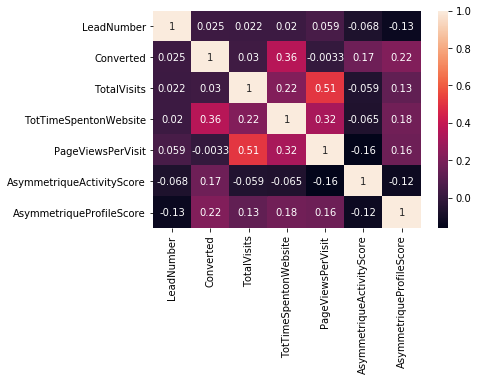

In [2926]:
sns.heatmap(df.corr(),annot=True)

##### Correlation between PageViewPerVisit and Total visits are high
##### TotTimeSpentonWebsite is correlated with target variable 'Converted' more

##### Finding and dropping 5  columns has one unique value which is not useful for analysis

In [2927]:
df.columns[df.nunique()==1 ]

Index(['Magazine', 'RecieveCourseUpdates', 'UpdateSuppyChainContent',
       'UpdatesonDMContent', 'AgreeChequePayment'],
      dtype='object')

In [2928]:
df.drop(df.columns[ df.nunique()==1 ],inplace =True,axis=1)

In [2929]:
df.shape

(9240, 32)

##### Function for finding missing values

In [2930]:
def findingmissingvalues(data):
    missing_values = data.isnull().sum()
    missing_values =missing_values[missing_values>0]
    missing_values.sort_values(inplace =True)
    return missing_values


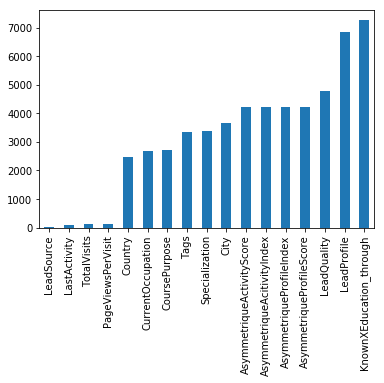

In [2931]:
missingdata = findingmissingvalues(df)

missingdata.plot(kind='bar')

In [2932]:
print(missingdata)

LeadSource                      36
LastActivity                   103
TotalVisits                    137
PageViewsPerVisit              137
Country                       2461
CurrentOccupation             2690
CoursePurpose                 2709
Tags                          3353
Specialization                3380
City                          3669
AsymmetriqueActivityScore     4218
AsymmetriqueAcitivityIndex    4218
AsymmetriqueProfileIndex      4218
AsymmetriqueProfileScore      4218
LeadQuality                   4767
LeadProfile                   6855
KnownXEducation_through       7250
dtype: int64


In [2933]:
missingdata/len(df)*100

LeadSource                     0.389610
LastActivity                   1.114719
TotalVisits                    1.482684
PageViewsPerVisit              1.482684
Country                       26.634199
CurrentOccupation             29.112554
CoursePurpose                 29.318182
Tags                          36.287879
Specialization                36.580087
City                          39.707792
AsymmetriqueActivityScore     45.649351
AsymmetriqueAcitivityIndex    45.649351
AsymmetriqueProfileIndex      45.649351
AsymmetriqueProfileScore      45.649351
LeadQuality                   51.590909
LeadProfile                   74.188312
KnownXEducation_through       78.463203
dtype: float64

##### Finding the column which has more than 30% of the data

In [2934]:

missingGT30percent =missingdata[(missingdata/len(df)*100)>30]
print(missingGT30percent)


Tags                          3353
Specialization                3380
City                          3669
AsymmetriqueActivityScore     4218
AsymmetriqueAcitivityIndex    4218
AsymmetriqueProfileIndex      4218
AsymmetriqueProfileScore      4218
LeadQuality                   4767
LeadProfile                   6855
KnownXEducation_through       7250
dtype: int64


##### Analysing the columns with target variable 'Converted' which has 30% null values 

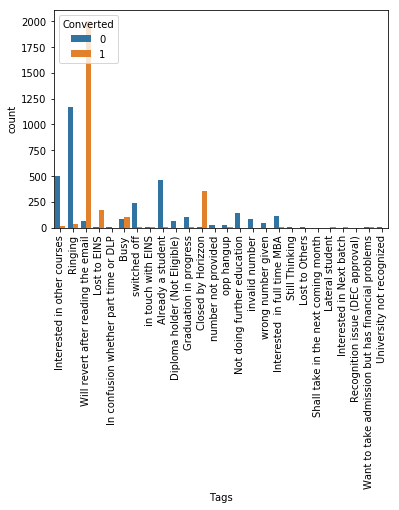

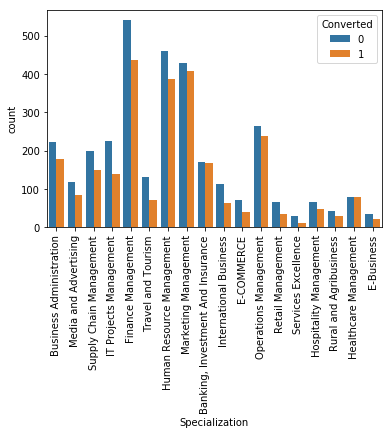

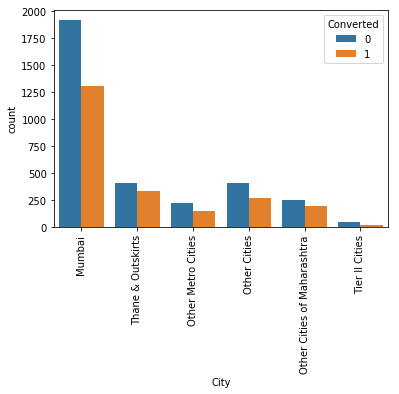

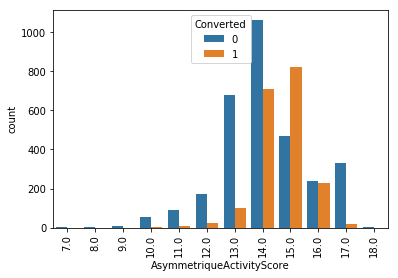

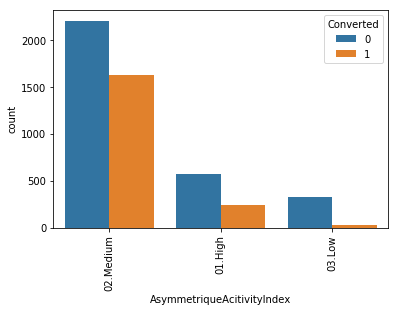

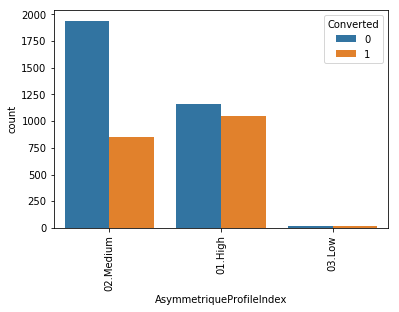

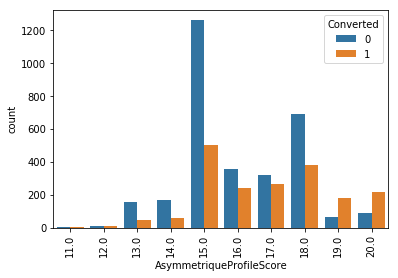

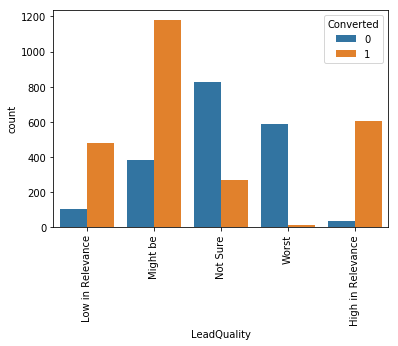

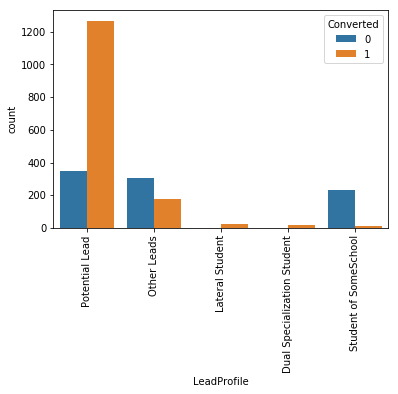

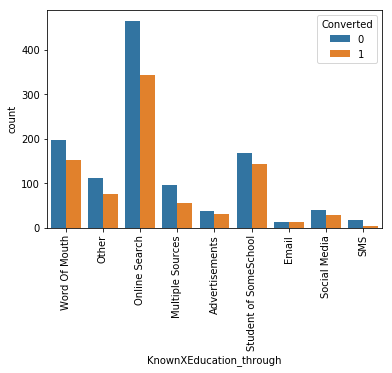

In [2935]:
for col in missingGT30percent.index:
    sns.countplot(df[col],hue = df.Converted)
    plt.xticks(rotation=90)
    plt.show()

In [2936]:
numerical = [f for f in df.columns if df.dtypes[f] != 'object']
categorical = [f for f in df.columns if df.dtypes[f] == 'object']

In [2937]:
categorical.remove('ProspectID')

##### Univariant analysis

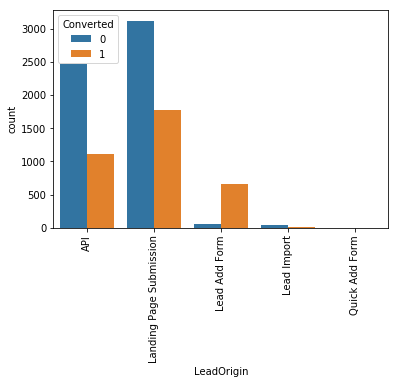

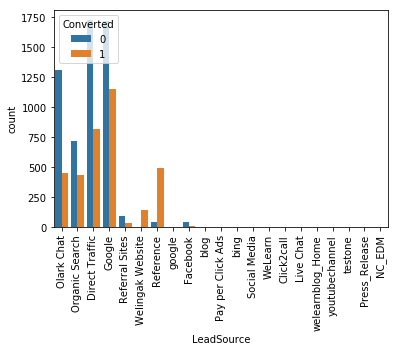

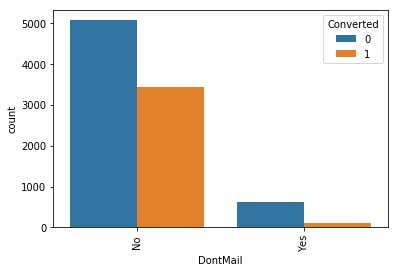

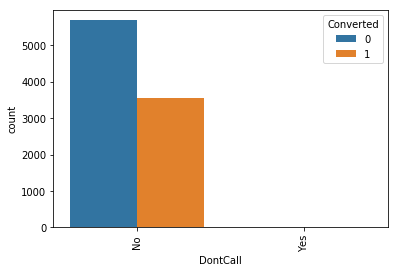

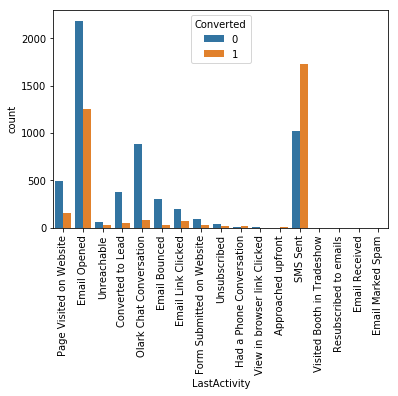

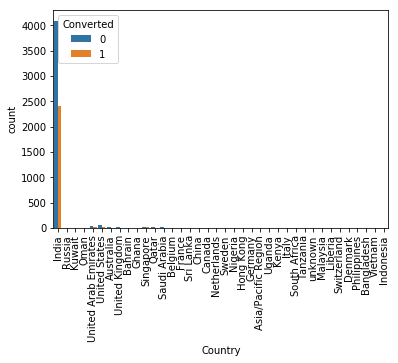

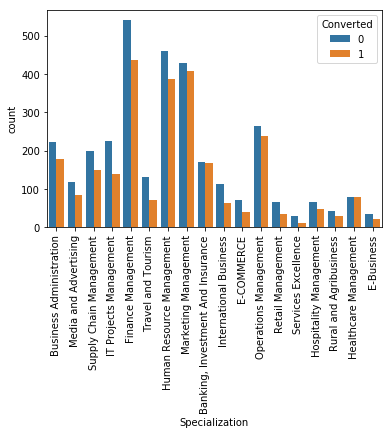

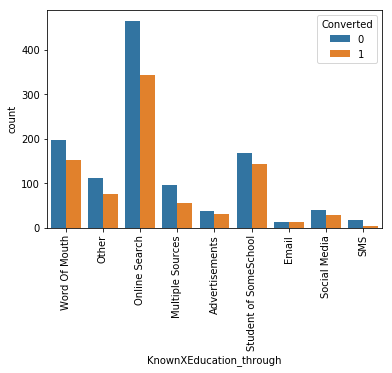

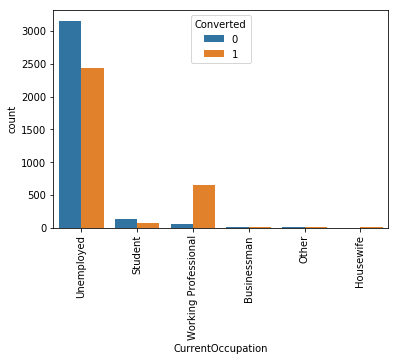

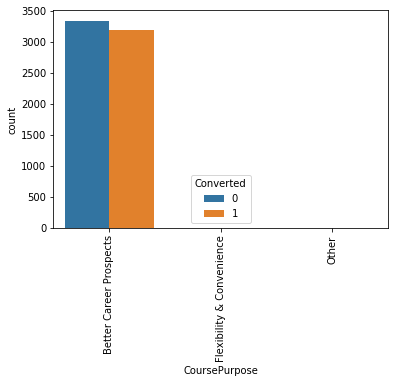

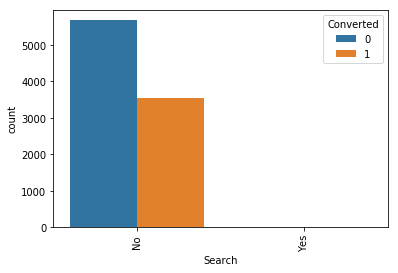

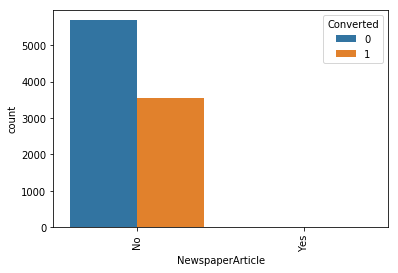

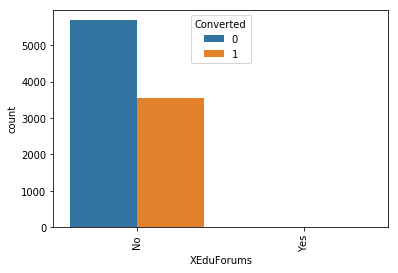

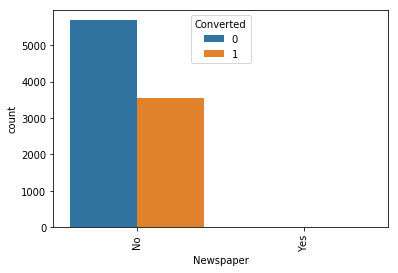

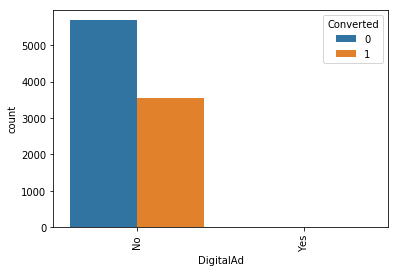

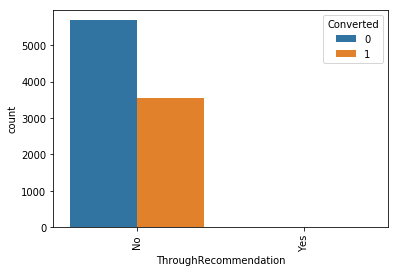

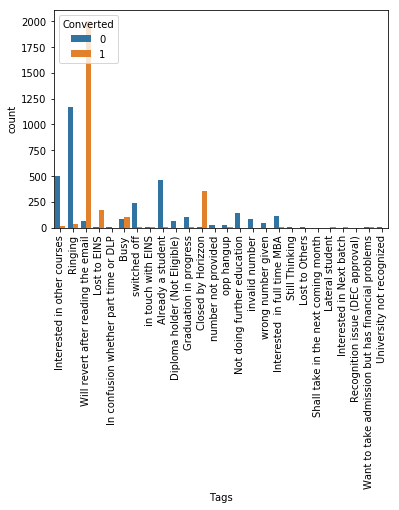

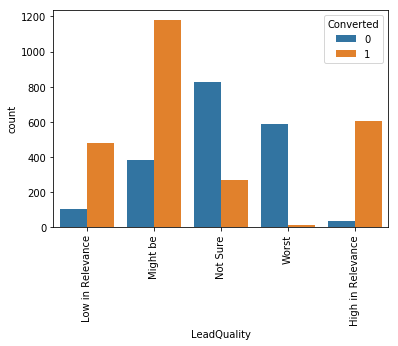

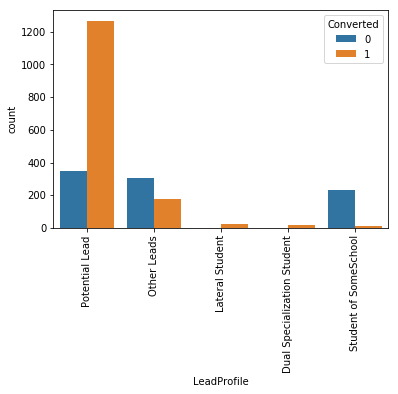

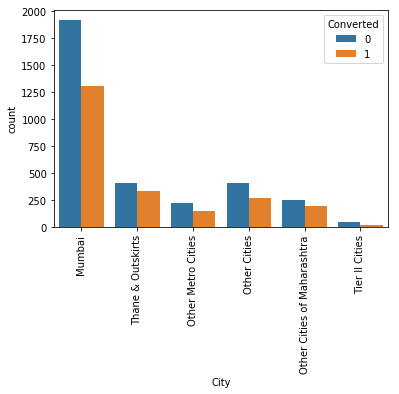

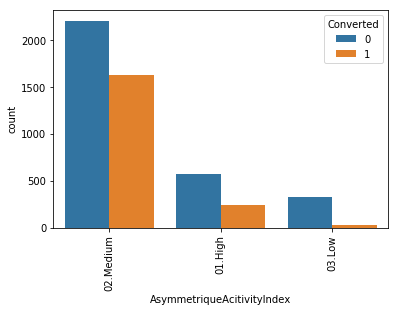

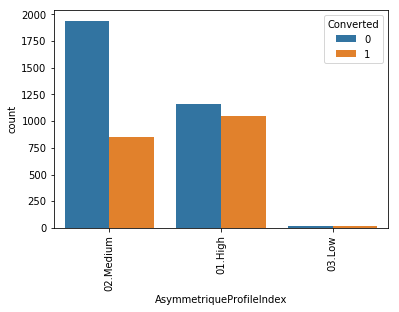

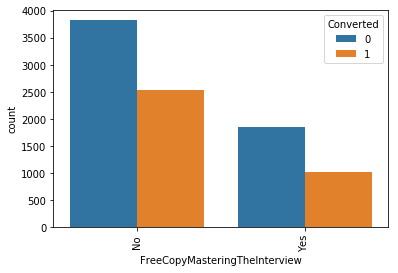

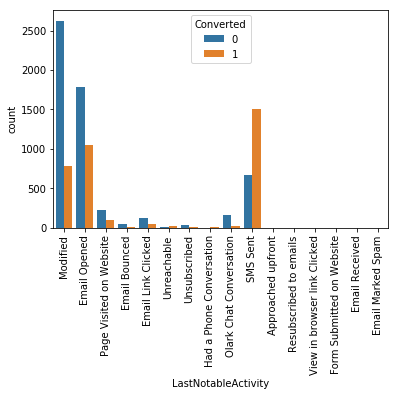

In [2938]:
for col in categorical:
    sns.countplot(df[col],hue = df.Converted)
    plt.xticks(rotation=90)
    plt.show()

##### API and Landing Page Submission have high conversion rate but count of leads are more.
##### Lead Add Form has high conversion rate almost 90%  with very less lead count.
##### Lead Import and QuickaddFrom are very less in count.

In [2939]:
df.shape

(9240, 32)

###### Country Field analysis

In [2940]:
print('NotIndia',df.loc[(df.Country !='India')].shape)
print('India',df.loc[(df.Country =='India')].shape)
print('OtherCountry_CityNull',df.loc[(df.Country !='India')& (df.City.isnull() == True)].shape)
print('India_CityNull',df.loc[(df.Country =='India')& (df.City.isnull() == True)].shape)
print('India_CityNotNull',df.loc[(df.Country =='India')& (df.City.isnull() == False)].shape)
print('OtherCountry_CityNotNull',df.loc[(df.Country !='India')& (df.City.isnull() == False)].shape)

NotIndia (2748, 32)
India (6492, 32)
OtherCountry_CityNull (2115, 32)
India_CityNull (1554, 32)
India_CityNotNull (4938, 32)
OtherCountry_CityNotNull (633, 32)


In [2941]:
df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
Nigeria                    4
South Africa               4
Germany                    4
Kuwait                     4
Sweden                     3
Philippines                2
Ghana                      2
Italy                      2
Belgium                    2
Asia/Pacific Region        2
Bangladesh                 2
China                      2
Uganda                     2
Netherlands                2
Vietnam                    1
Liberia                    1
Kenya                      1
Tanzania                   1
Malaysia                   1
Denmark                    1
Russia        

##### in case, Country is not an India, city is almost null. 
##### In case, Country is India, city is almost not null.
##### All city name given in data set  are located in India. Even for other country Indian city is given as city value which is wrong data.
##### no proper city details for other countries.  country column is not necessary for further analysis.

In [2942]:
df.drop('Country',inplace =True,axis=1)

In [2943]:
print("Totalconversion for all Specialization",(df.groupby('Specialization')['Converted'].sum()).sum())
df.groupby('Specialization')['Converted'].sum()

Totalconversion for all Specialization 2592


Specialization
Banking, Investment And Insurance    167
Business Administration              179
E-Business                            21
E-COMMERCE                            40
Finance Management                   436
Healthcare Management                 79
Hospitality Management                48
Human Resource Management            388
IT Projects Management               140
International Business                64
Marketing Management                 408
Media and Advertising                 85
Operations Management                238
Retail Management                     34
Rural and Agribusiness                31
Services Excellence                   11
Supply Chain Management              151
Travel and Tourism                    72
Name: Converted, dtype: int64

In [2944]:
#df.drop(['Specialization'],axis=1,inplace=True)

In [2945]:
print("Totalconversion for all Tags",(df.groupby('Tags')['Converted'].sum()).sum())
df.groupby('Tags')['Converted'].sum()

Totalconversion for all Tags 2725


Tags
Already a student                                       3
Busy                                                  105
Closed by Horizzon                                    356
Diploma holder (Not Eligible)                           1
Graduation in progress                                  7
In confusion whether part time or DLP                   1
Interested  in full time MBA                            3
Interested in Next batch                                5
Interested in other courses                            13
Lateral student                                         3
Lost to EINS                                          171
Lost to Others                                          0
Not doing further education                             1
Recognition issue (DEC approval)                        0
Ringing                                                34
Shall take in the next coming month                     1
Still Thinking                                          1
Universit

In [2946]:
df.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [2947]:

print("Totalconversion for all Cities",(df.groupby('City')['Converted'].sum()).sum())
df.groupby('City')['Converted'].sum()

Totalconversion for all Cities 2304


City
Mumbai                         1309
Other Cities                    276
Other Cities of Maharashtra     201
Other Metro Cities              155
Thane & Outskirts               338
Tier II Cities                   25
Name: Converted, dtype: int64

In [2948]:
df.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

##### As 30% null value is high, removing rows which has null value lead to loss of more data. imputing 30% null value
##### would be high risk of assumption.

In [2949]:
df.drop(['Tags','Specialization','City', 'AsymmetriqueActivityScore','AsymmetriqueAcitivityIndex','AsymmetriqueProfileIndex',
        'AsymmetriqueProfileScore','LeadQuality','LeadProfile','KnownXEducation_through'],axis=1,inplace =True)

##### Remaining missing data is analysed

In [2950]:
missingdata = findingmissingvalues(df)

missingdata
missingdata/len(df)*100

LeadSource            0.389610
LastActivity          1.114719
TotalVisits           1.482684
PageViewsPerVisit     1.482684
CurrentOccupation    29.112554
CoursePurpose        29.318182
dtype: float64

In [2951]:
df.CurrentOccupation.value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: CurrentOccupation, dtype: int64

In [2952]:
print("Totalconversion for all Occupation",(df.groupby('CurrentOccupation')['Converted'].sum()).sum())
df.groupby('CurrentOccupation')['Converted'].sum()

Totalconversion for all Occupation 3191


CurrentOccupation
Businessman                5
Housewife                 10
Other                     10
Student                   78
Unemployed              2441
Working Professional     647
Name: Converted, dtype: int64

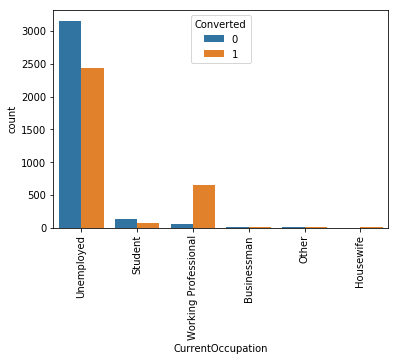

In [2953]:
sns.countplot(df.CurrentOccupation,hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

##### Working Professionals has high chances of joining course
##### Unemployed leads are more but converstsion rate is not much
##### student, businessman,other, housewife category has very less lead count

##### Current occupation has 29% null values, imputing will be at high risk of assumption, deleting the rows which has 
##### null values

In [2954]:
#df.CurrentOccupation =df.CurrentOccupation.fillna(df.CurrentOccupation.value_counts().idxmax())
df.dropna(subset=['CurrentOccupation'],axis=0, inplace=True)

CoursePurpose         19
LeadSource            36
LastActivity         103
TotalVisits          130
PageViewsPerVisit    130
dtype: int64

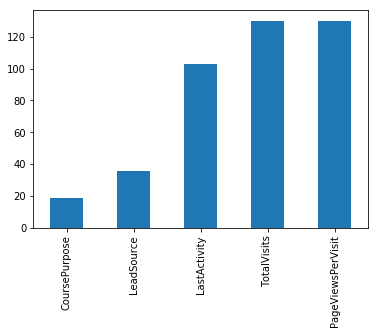

In [2955]:
missingdata = findingmissingvalues(df)

missingdata.plot(kind='bar')
missingdata

In [2956]:
missingdata/len(df)*100

CoursePurpose        0.290076
LeadSource           0.549618
LastActivity         1.572519
TotalVisits          1.984733
PageViewsPerVisit    1.984733
dtype: float64

##### Last acitvity column is analysed

In [2957]:
df['LastActivity'].value_counts()

Email Opened                    2460
SMS Sent                        2213
Page Visited on Website          429
Olark Chat Conversation          428
Converted to Lead                296
Email Bounced                    197
Email Link Clicked               178
Form Submitted on Website         82
Unreachable                       74
Unsubscribed                      43
Had a Phone Conversation          28
Approached upfront                 9
View in browser link Clicked       5
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Name: LastActivity, dtype: int64

##### As it has only 1.5% null value, it is imputed by most frequent data

In [2958]:
df['LastActivity'].value_counts().idxmax()

'Email Opened'

In [2959]:
df['LastActivity'].isnull().sum()

103

In [2960]:
df['LastActivity'] =  df['LastActivity'].fillna(df['LastActivity'].value_counts().idxmax())

##### Lead Source column is analyzed

In [2961]:
df['LeadSource'].value_counts()

Google               2048
Direct Traffic       1891
Olark Chat            893
Organic Search        870
Reference             534
Welingak Website      142
Referral Sites         75
Facebook               46
Click2call              4
bing                    3
Social Media            2
Live Chat               2
WeLearn                 1
testone                 1
Pay per Click Ads       1
Press_Release           1
Name: LeadSource, dtype: int64

In [2962]:
df['LeadSource'].value_counts().idxmax()

'Google'

##### data is cleaned as it has Casing issue in data

In [2963]:
df['LeadSource'] =df['LeadSource'].apply(lambda x:str(x).replace('google','Google'))

##### As it has very less null value, it is imputed with most frequent value

In [2964]:
df['LeadSource'] =  df['LeadSource'].fillna(df['LeadSource'].value_counts().idxmax())

In [2965]:
df['TotalVisits'].median()

3.0

In [2966]:
df['PageViewsPerVisit'].median()

2.0

In [2967]:
#Total visit and Pageviewper visit is imputed with median value
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())

In [2968]:

df['PageViewsPerVisit'] = df['PageViewsPerVisit'].fillna(df['PageViewsPerVisit'].median())

In [2969]:
df.CoursePurpose.value_counts()   

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: CoursePurpose, dtype: int64

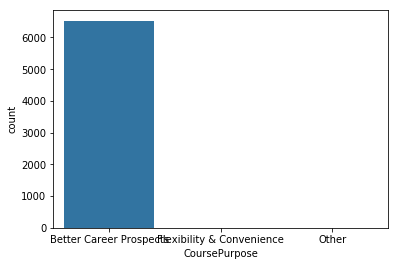

In [2970]:
sns.countplot(df.CoursePurpose)
plt.show()

##### As CoursePurpose column has one unique value(BetterCareerProspects) more. As Other two categories are very less, imputing null values

##### with most frequent data.


In [2971]:
#df.drop('CoursePurpose',axis=1,inplace=True)
df.CoursePurpose = df.CoursePurpose.fillna(df.CoursePurpose.value_counts().idxmax())

In [2972]:
df.CoursePurpose.value_counts()

Better Career Prospects      6547
Flexibility & Convenience       2
Other                           1
Name: CoursePurpose, dtype: int64

In [2973]:
missingdata = findingmissingvalues(df) 
missingdata

Series([], dtype: int64)

##### All null values are handled

In [2974]:
df.shape

(6550, 21)

In [2975]:
df.Converted.sum()/len(df)*100

48.717557251908396

##### After handling null values, conversion rate is around 49% for 6550 observation

In [2976]:
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(["Converted"], ascending = False, inplace = True)
print(corr.Converted.sort_values(ascending = False))


Find most important features relative to target
Converted                1.000000
TotTimeSpentonWebsite    0.316561
LeadNumber               0.098493
TotalVisits              0.002372
PageViewsPerVisit       -0.067639
Name: Converted, dtype: float64


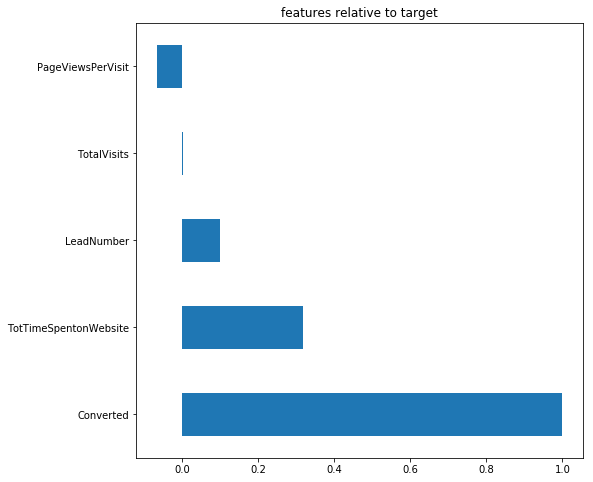

In [2977]:
fig = plt.figure(figsize =(8,8))
corr.Converted.plot(kind = "barh")
plt.title("features relative to target")
plt.show()

##### Pageviewspervisit has negative correlation with target variable 'Converted'
##### Other variables are postively correlated and TotTimeSpentonWebsite has high correaltion with target variable

In [2978]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6550 entries, 0 to 9239
Data columns (total 21 columns):
ProspectID                       6550 non-null object
LeadNumber                       6550 non-null int64
LeadOrigin                       6550 non-null object
LeadSource                       6550 non-null object
DontMail                         6550 non-null object
DontCall                         6550 non-null object
Converted                        6550 non-null int64
TotalVisits                      6550 non-null float64
TotTimeSpentonWebsite            6550 non-null int64
PageViewsPerVisit                6550 non-null float64
LastActivity                     6550 non-null object
CurrentOccupation                6550 non-null object
CoursePurpose                    6550 non-null object
Search                           6550 non-null object
NewspaperArticle                 6550 non-null object
XEduForums                       6550 non-null object
Newspaper                     

##### Again checking one unique value columns. XEduForums has one unique value which is removed

In [2979]:
df.columns[df.nunique() ==1]

Index(['XEduForums'], dtype='object')

In [2980]:
df.drop(['XEduForums'],axis=1,inplace =True)

In [2981]:
numerical = [f for f in df.columns if df.dtypes[f] != 'object']
categorical = [f for f in df.columns if df.dtypes[f] == 'object']

In [2982]:
categorical.remove('ProspectID')

In [2983]:
numerical.remove('Converted')
numerical

['LeadNumber', 'TotalVisits', 'TotTimeSpentonWebsite', 'PageViewsPerVisit']

In [2984]:
df['TotalVisits'].describe()

count    6550.000000
mean        3.592061
std         4.987662
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [2985]:
df['PageViewsPerVisit'].describe()

count    6550.000000
mean        2.457710
std         2.145947
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        55.000000
Name: PageViewsPerVisit, dtype: float64

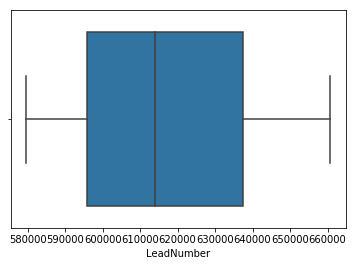

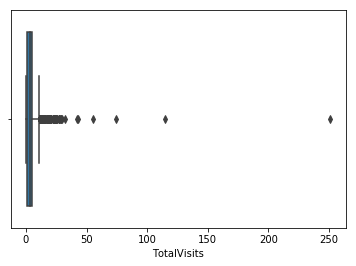

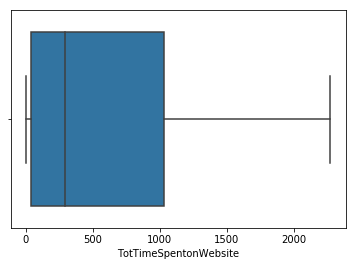

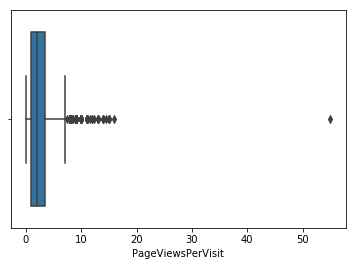

In [2986]:
for col in df[numerical]:
    sns.boxplot(df[col])
    plt.show()

In [2987]:
def FindingOutliers(cols):
    q1,q3 = np.percentile(df[cols],[25,75])
    IQR = q3-q1
    lowerbound = q1 - 1.5 * IQR
    upperbound = q3 + 1.5 * IQR
    print(cols,": ",lowerbound,upperbound)
    return lowerbound,upperbound

for col in df[numerical]:
    
    lower, upper =FindingOutliers(col)
#df =df.loc[~(df[col] >upperbound)]


LeadNumber :  533904.875 699375.875
TotalVisits :  -5.0 11.0
TotTimeSpentonWebsite :  -1457.5 2522.5
PageViewsPerVisit :  -2.75 7.25


In [2988]:
q1,q2,q3,q4,q5 = np.percentile(df['TotalVisits'],[25,50,75,90,95])
q1,q2,q3,q4,q5

(1.0, 3.0, 5.0, 7.0, 10.0)

In [2989]:
q1,q2,q3,q4,q5 = np.percentile(df['PageViewsPerVisit'],[25,50,75,90,95])
q1,q2,q3,q4,q5

(1.0, 2.0, 3.5, 5.0, 6.0)

In [2990]:
df[(df.PageViewsPerVisit >6.0) &(df.Converted ==1)].shape[0]/len(df)

0.018931297709923665

In [2991]:
df[(df.TotalVisits >10.0) &(df.Converted ==1)].shape[0]/len(df)

0.023053435114503817

##### Outliers are in TotalVisits,PageViewsPerVisit. lowerbound outliers are not present in both columns.
##### customer may visit the webpage more than 100 times which is not to be considered as outliers.
##### customer may  view more than 10 pages while visiting the website, if webpage contains more pages.
##### It is statistical outlier not domain outliers, so not removed.

In [2992]:
#def HandlingOutliers(cols):
#    q1,q3 = np.percentile(df[cols],[25,75])
#    IQR = q3-q1
#    lowerbound = q1 - 1.5 * IQR
#    upperbound = q3 + 1.5 * IQR
#    print(cols,": ",lowerbound,upperbound)
#    return lowerbound,upperbound

#for col in ['PageViewsPerVisit']:
    
#lower, upper =HandlingOutliers('PageViewsPerVisit')
    #df =df.loc[(df[col] >upperbound)]
#median = df.loc[df[col]<upper, col].median()
#print(col,': ',median)
#df.loc[df[col] > upper, col] = np.nan
#df.fillna(median,inplace=True)

##### Analysing Yes/No columns

In [2993]:
for col in df[categorical]:
    print(col,": ",'\n',df[col].value_counts(),'\n')

LeadOrigin :  
 Landing Page Submission    3644
API                        2141
Lead Add Form               718
Lead Import                  46
Quick Add Form                1
Name: LeadOrigin, dtype: int64 

LeadSource :  
 Google               2048
Direct Traffic       1891
Olark Chat            893
Organic Search        870
Reference             534
Welingak Website      142
Referral Sites         75
Facebook               46
nan                    36
Click2call              4
bing                    3
Live Chat               2
Social Media            2
WeLearn                 1
testone                 1
Pay per Click Ads       1
Press_Release           1
Name: LeadSource, dtype: int64 

DontMail :  
 No     6086
Yes     464
Name: DontMail, dtype: int64 

DontCall :  
 No     6548
Yes       2
Name: DontCall, dtype: int64 

LastActivity :  
 Email Opened                    2563
SMS Sent                        2213
Page Visited on Website          429
Olark Chat Conversation          

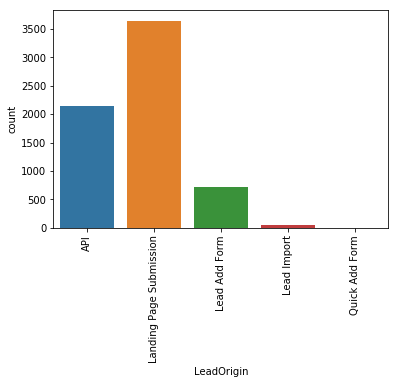

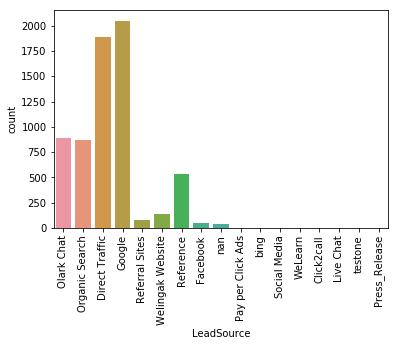

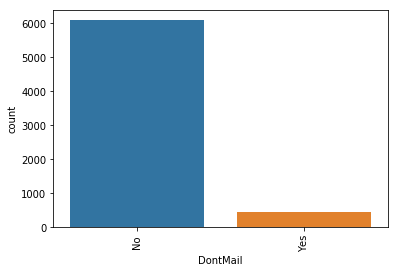

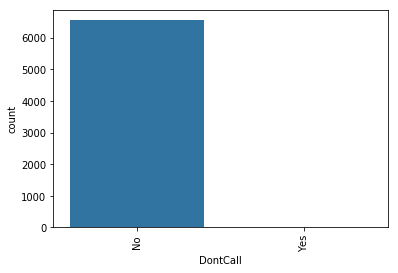

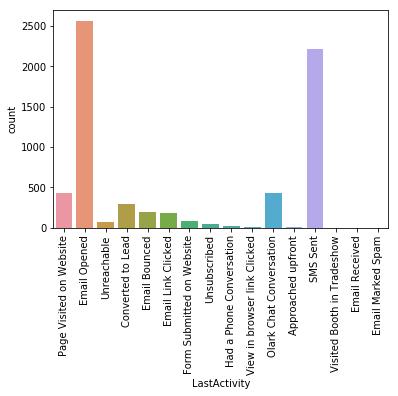

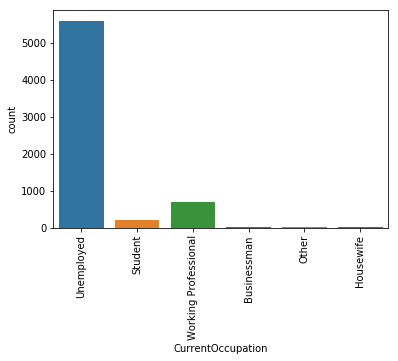

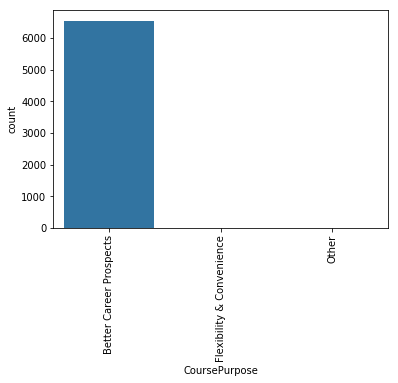

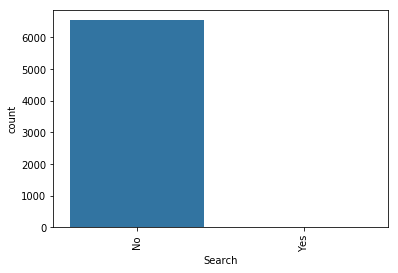

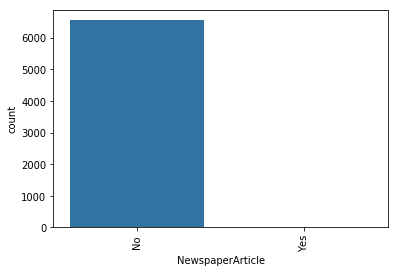

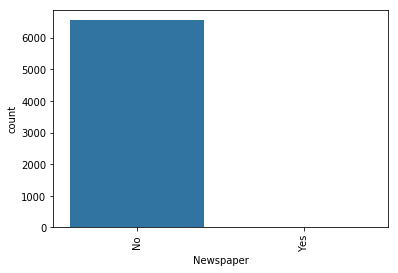

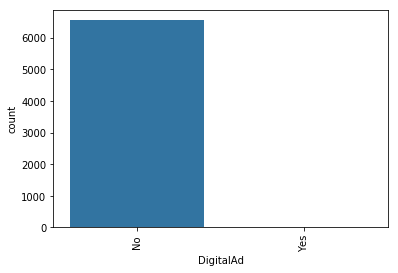

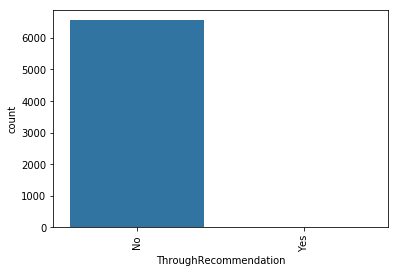

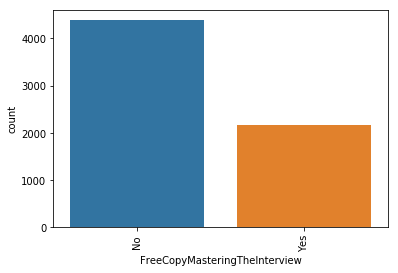

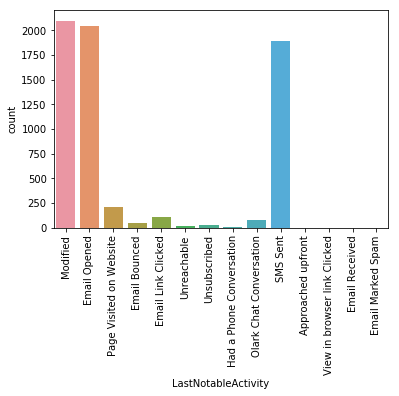

In [2994]:
for col in df[categorical]:
    sns.countplot(x=col,data= df)
    plt.xticks(rotation=90)
    plt.show()

In [2995]:
YesNoColumn=[]
for col in categorical:
    if (df[col].nunique() ==2):
        YesNoColumn.append(col)
        
print(YesNoColumn)

['DontMail', 'DontCall', 'Search', 'NewspaperArticle', 'Newspaper', 'DigitalAd', 'ThroughRecommendation', 'FreeCopyMasteringTheInterview']


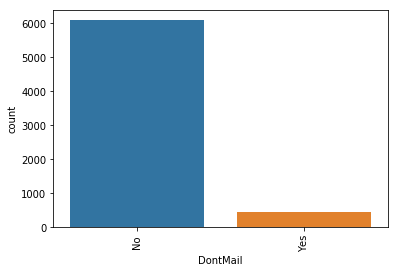

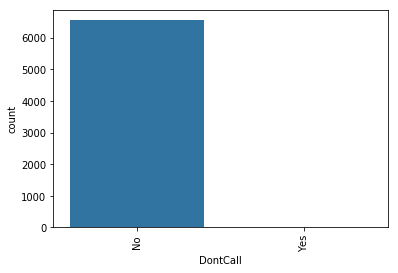

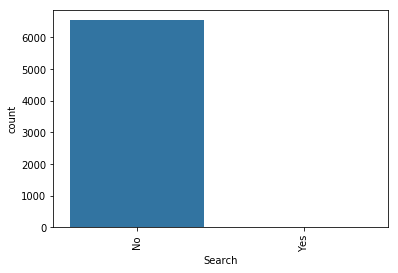

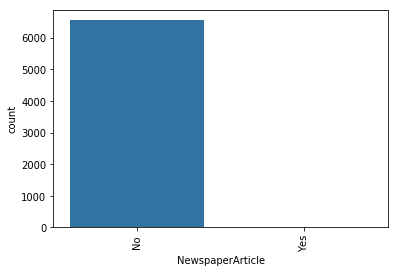

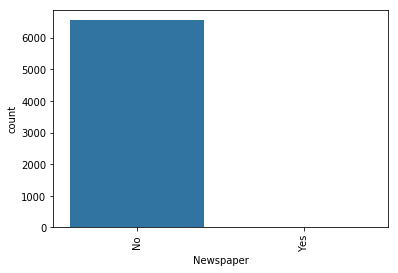

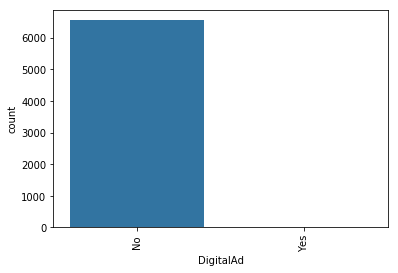

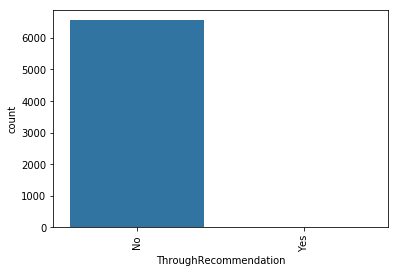

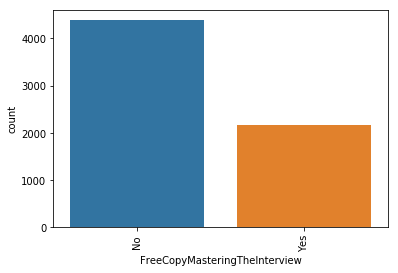

In [2996]:
for col in df[YesNoColumn]:
    sns.countplot(x=col,data= df)
    plt.xticks(rotation=90)
    plt.show()

In [2997]:
for col in YesNoColumn:
    print(df[col].value_counts())


No     6086
Yes     464
Name: DontMail, dtype: int64
No     6548
Yes       2
Name: DontCall, dtype: int64
No     6540
Yes      10
Name: Search, dtype: int64
No     6549
Yes       1
Name: NewspaperArticle, dtype: int64
No     6549
Yes       1
Name: Newspaper, dtype: int64
No     6547
Yes       3
Name: DigitalAd, dtype: int64
No     6544
Yes       6
Name: ThroughRecommendation, dtype: int64
No     4379
Yes    2171
Name: FreeCopyMasteringTheInterview, dtype: int64


##### Most of yes/No columns has more 'No'. one or two 'Yes' only. 

In [2998]:
df.drop(['ThroughRecommendation','DigitalAd','Newspaper','NewspaperArticle','Search',
        'DontCall'],axis=1,inplace =True)

In [2999]:
df.shape

(6550, 14)

In [3000]:
numerical = [f for f in df.columns if df.dtypes[f] != 'object']
categorical = [f for f in df.columns if df.dtypes[f] == 'object']
categorical.remove('ProspectID')

In [3001]:
df.LeadNumber.describe()

count      6550.000000
mean     616441.371908
std       23431.020186
min      579533.000000
25%      595956.500000
50%      614028.500000
75%      637324.250000
max      660737.000000
Name: LeadNumber, dtype: float64

In [3002]:
YesNoColumn=[]
for col in categorical:
    if (df[col].nunique() ==2):
        YesNoColumn.append(col)
        
print(YesNoColumn)

['DontMail', 'FreeCopyMasteringTheInterview']


In [3003]:
# Defining the map function for yes/no with 1/0
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the customer list
df[YesNoColumn] = df[YesNoColumn].apply(binary_map)

In [3004]:
categorical = [f for f in df.columns if df.dtypes[f] == 'object']
categorical.remove('ProspectID')
categorical

['LeadOrigin',
 'LeadSource',
 'LastActivity',
 'CurrentOccupation',
 'CoursePurpose',
 'LastNotableActivity']

In [3005]:
df.LastNotableActivity.value_counts()

Modified                        2096
Email Opened                    2042
SMS Sent                        1889
Page Visited on Website          214
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     50
Unsubscribed                      33
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Name: LastNotableActivity, dtype: int64

##### Dummy variables are created for categorical data

In [3006]:
for col in categorical:
    col_df = pd.get_dummies(df[col], drop_first = True).rename(columns=lambda x: col+'_' + str(x))
    df = pd.concat([df, col_df], axis=1)
    df.drop(col, inplace=True, axis=1)

In [3007]:
df.head()

,ProspectID,LeadNumber,DontMail,Converted,TotalVisits,TotTimeSpentonWebsite,PageViewsPerVisit,FreeCopyMasteringTheInterview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,...,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [3008]:
df.columns

Index(['ProspectID', 'LeadNumber', 'DontMail', 'Converted', 'TotalVisits',
       'TotTimeSpentonWebsite', 'PageViewsPerVisit',
       'FreeCopyMasteringTheInterview', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadOrigin_Lead Import',
       'LeadOrigin_Quick Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Facebook', 'LeadSource_Google', 'LeadSource_Live Chat',
       'LeadSource_Olark Chat', 'LeadSource_Organic Search',
       'LeadSource_Pay per Click Ads', 'LeadSource_Press_Release',
       'LeadSource_Reference', 'LeadSource_Referral Sites',
       'LeadSource_Social Media', 'LeadSource_WeLearn',
       'LeadSource_Welingak Website', 'LeadSource_bing', 'LeadSource_nan',
       'LeadSource_testone', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Email Link Clicked',
       'LastActivity_Email Marked Spam', 'LastActivity_Email Opened',
       'LastActivity_Email Received', 'LastActivity_Form Submitted on

In [3009]:
df.shape

(6550, 63)

In [3010]:
df.drop('LeadNumber',axis =1,inplace =True)

In [3011]:
df_orginal =df.copy()

In [3012]:
#X = df.drop(['Converted'], axis=1)
X = df.drop(['Converted','ProspectID'], axis=1)
#X = df.drop(['Converted','LeadNumber'], axis=1)
X.head()

,DontMail,TotalVisits,TotTimeSpentonWebsite,PageViewsPerVisit,FreeCopyMasteringTheInterview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Direct Traffic,...,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [3013]:
y= df['Converted']

In [3014]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [3015]:
numerical

['LeadNumber',
 'Converted',
 'TotalVisits',
 'TotTimeSpentonWebsite',
 'PageViewsPerVisit']

##### Feature Scaling

In [3016]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'TotTimeSpentonWebsite', 'PageViewsPerVisit']] = scaler.fit_transform(X_train[['TotalVisits', 'TotTimeSpentonWebsite', 'PageViewsPerVisit']])
#X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_train.head()

C:\Users\VJT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\VJT\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,DontMail,TotalVisits,TotTimeSpentonWebsite,PageViewsPerVisit,FreeCopyMasteringTheInterview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Direct Traffic,...,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
8766,0,0.095652,0.261444,0.066727,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
148,0,0.043478,0.102113,0.045455,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8146,0,0.121739,0.801937,0.127273,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2782,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6309,0,0.000000,0.000000,0.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [3017]:
X_train.TotalVisits.describe()

count    4585.000000
mean        0.030940
std         0.035298
min         0.000000
25%         0.008696
50%         0.026087
75%         0.043478
max         1.000000
Name: TotalVisits, dtype: float64

In [3018]:
### Checking the Converted Rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

48.717557251908396

#### Model Building

In [3019]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\VJT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\VJT\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\VJT\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\VJT\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\VJT\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\VJT\Anaconda3\lib\site-p

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4532
Model Family:                Binomial   Df Model:                           52
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Jun 2019   Deviance:                          nan
Time:                        22:08:43   Pearson chi2:                 6.40e+18
No. Iterations:                   100   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             3.553e+15   6.58e+07    5.4e+07      0.000    3.55e+15    3.55e+15
DontMail                                         -4.414e+14   5.26e+06   -8.4e+07      0.000   -4.41e+14   -4.41e+14
TotalVisits                                       1.007e+15   3.82e+07   2.64e+07      0.000    1.01e+15    1.01e+15
TotTimeSpentonWebsite                             1.666e+15   4.44e+06   3.76e+08      0.000    1.67e+15    1.67e+15
PageViewsPerVisit                                 1.095e+15   3.72e+07   2.94e+07      0.000    1.09e+15    1.09e+15
FreeCopyMasteringTheInterview                     4.213e+14   3.03e+06   1.39e+08      0.000    4.21e+14    4.21e+14
LeadOrigin_Landing Page Submission                1.194e+13   3.13e+06   3.82e+06      0.000    1.19e+13    1.19e+13
LeadOrigin_Lead Add Form                          7.044e+14   4.82e+07   1.46e+07      0.000    7.04e+14    7.04e+14
LeadOrigin_Lead Import                           -9.792e+14   3.15e+07  -3.11e+07      0.000   -9.79e+14   -9.79e+14
LeadOrigin_Quick Add Form                         4.276e+15   8.31e+07   5.15e+07      0.000    4.28e+15    4.28e+15
LeadSource_Direct Traffic                        -1.653e+15   6.19e+07  -2.67e+07      0.000   -1.65e+15   -1.65e+15
LeadSource_Facebook                              -9.792e+14   3.15e+07  -3.11e+07      0.000   -9.79e+14   -9.79e+14
LeadSource_Google                                -2.169e+15   6.19e+07   -3.5e+07      0.000   -2.17e+15   -2.17e+15
LeadSource_Live Chat                              3.256e+15   7.75e+07    4.2e+07      0.000    3.26e+15    3.26e+15
LeadSource_Olark Chat                            -1.625e+15   6.19e+07  -2.63e+07      0.000   -1.63e+15   -1.63e+15
LeadSource_Organic Search                        -1.237e+15    6.2e+07     -2e+07      0.000   -1.24e+15   -1.24e+15
LeadSource_Pay per Click Ads                     -4.864e+15   9.13e+07  -5.33e+07      0.000   -4.86e+15   -4.86e+15
LeadSource_Press_Release                           -42.8487   9.83e-07  -4.36e+07      0.000     -42.849     -42.849
LeadSource_Reference                             -9.228e+14    3.9e+07  -2.37e+07      0.000   -9.23e+14   -9.23e+14
LeadSource_Referral Sites                        -1.527e+15   6.27e+07  -2.43e+07      0.000   -1.53e+15   -1.53e+15
LeadSource_Social Media                          -3.209e+15   7.82e+07  -4.11e+07      0.000   -3.21e+15   -3.21e+15
LeadSource_WeLearn                                3.216e+15   9.13e+07   3.52e+07      0.000    3.22e+15    3.22e+15
LeadSource_Welingak Website                      -2.949e+14   3.95e+07  -7.47e+06      0.000   -2.95e+14   -2.95e+14
LeadSource_bing                                  -5.217e+15   9.13e+07  -5.71e+07      0.000   -5.22e+15   -5.22e+15
Lea

In [3020]:
# Running RFE with the output number of the variable equal to 15
lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\VJT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VJT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VJT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VJT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VJT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

In [3021]:
#displaying RFE supporting variables and ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('DontMail', True, 1),
 ('TotalVisits', True, 1),
 ('TotTimeSpentonWebsite', True, 1),
 ('PageViewsPerVisit', True, 1),
 ('FreeCopyMasteringTheInterview', False, 40),
 ('LeadOrigin_Landing Page Submission', False, 29),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 35),
 ('LeadOrigin_Quick Add Form', False, 22),
 ('LeadSource_Direct Traffic', True, 1),
 ('LeadSource_Facebook', False, 30),
 ('LeadSource_Google', False, 4),
 ('LeadSource_Live Chat', False, 34),
 ('LeadSource_Olark Chat', False, 9),
 ('LeadSource_Organic Search', False, 2),
 ('LeadSource_Pay per Click Ads', False, 20),
 ('LeadSource_Press_Release', False, 45),
 ('LeadSource_Reference', False, 10),
 ('LeadSource_Referral Sites', False, 3),
 ('LeadSource_Social Media', False, 13),
 ('LeadSource_WeLearn', False, 27),
 ('LeadSource_Welingak Website', True, 1),
 ('LeadSource_bing', False, 19),
 ('LeadSource_nan', False, 11),
 ('LeadSource_testone', False, 42),
 ('LastActivity_Converted to Lead', Fa

In [3022]:
#displaying RFE supporting variables and ranking
lst1 = list(zip(rfe.ranking_,X_train.columns,rfe.support_))
sorted(lst1)

[(1, 'CurrentOccupation_Housewife', True),
 (1, 'CurrentOccupation_Student', True),
 (1, 'CurrentOccupation_Unemployed', True),
 (1, 'CurrentOccupation_Working Professional', True),
 (1, 'DontMail', True),
 (1, 'LastActivity_SMS Sent', True),
 (1, 'LastNotableActivity_Had a Phone Conversation', True),
 (1, 'LastNotableActivity_Modified', True),
 (1, 'LastNotableActivity_Unreachable', True),
 (1, 'LeadOrigin_Lead Add Form', True),
 (1, 'LeadSource_Direct Traffic', True),
 (1, 'LeadSource_Welingak Website', True),
 (1, 'PageViewsPerVisit', True),
 (1, 'TotTimeSpentonWebsite', True),
 (1, 'TotalVisits', True),
 (2, 'LeadSource_Organic Search', False),
 (3, 'LeadSource_Referral Sites', False),
 (4, 'LeadSource_Google', False),
 (5, 'LastActivity_Olark Chat Conversation', False),
 (6, 'LastNotableActivity_Email Bounced', False),
 (7, 'LastActivity_Email Bounced', False),
 (8, 'LastActivity_Converted to Lead', False),
 (9, 'LeadSource_Olark Chat', False),
 (10, 'LeadSource_Reference', False)

In [3023]:
#RFE supported variables
col = X_train.columns[rfe.support_]
col

Index(['DontMail', 'TotalVisits', 'TotTimeSpentonWebsite', 'PageViewsPerVisit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Welingak Website', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_Student',
       'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified', 'LastNotableActivity_Unreachable'],
      dtype='object')

In [3024]:
#RFE non supported variables
X_train.columns[~rfe.support_]

Index(['FreeCopyMasteringTheInterview', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Import', 'LeadOrigin_Quick Add Form',
       'LeadSource_Facebook', 'LeadSource_Google', 'LeadSource_Live Chat',
       'LeadSource_Olark Chat', 'LeadSource_Organic Search',
       'LeadSource_Pay per Click Ads', 'LeadSource_Press_Release',
       'LeadSource_Reference', 'LeadSource_Referral Sites',
       'LeadSource_Social Media', 'LeadSource_WeLearn', 'LeadSource_bing',
       'LeadSource_nan', 'LeadSource_testone',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_Email Link Clicked', 'LastActivity_Email Marked Spam',
       'LastActivity_Email Opened', 'LastActivity_Email Received',
       'LastActivity_Form Submitted on Website',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation',
       'LastActivity_Page Visited on Website', 'LastActivity_Unreachable',
       'LastActivity_Unsubscribed',
      

In [3025]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
# Running the logistics model
lm = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())

print(lm.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4569
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.4
Date:                Mon, 10 Jun 2019   Deviance:                       4152.9
Time:                        22:08:46   Pearson chi2:                 4.60e+03
No. Iterations:                    22   Covariance Type:             nonrobust
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.0188      0.

C:\Users\VJT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [3026]:
#CurrentOccupation_Housewife is insignificant in presence of other variables; can be dropped
X_train_new = X_train_rfe.drop(["CurrentOccupation_Housewife"], axis = 1)
X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4570
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.6
Date:                Mon, 10 Jun 2019   Deviance:                       4157.2
Time:                        22:08:46   Pearson chi2:                 4.61e+03
No. Iterations:                    21   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.5277      0.522      1.011      0.312      -0.495       1.551
DontMail                                        -1.2807      0.177     -7.232      0.000      -1.628      -0.934
TotalVisits                                      4.2389      1.282      3.307      0.001       1.727       6.751
TotTimeSpentonWebsite                            4.0458      0.174     23.304      0.000       3.706       4.386
PageViewsPerVisit                               -9.7099      1.365     -7.114      0.000     -12.385      -7.035
LeadOrigin_Lead Add Form                         2.7293      0.198     13.803      0.000       2.342       3.117
LeadSource_Direct Traffic                       -0.7759      0.088     -8.850      0.000      -0.948      -0.604
LeadSource_Welingak Website                      2.4470      1.027      2.384      0.017       0.435       4.459
LastActivity_SMS Sent                            1.1400      0.084     13.504      0.000       0.975       1.305
CurrentOccupation_Student                       -1.5025      0.559     -2.688      0.007      -2.598      -0.407
CurrentOccupation_Unemployed                    -1.5197      0.515     -2.949      0.003      -2.530      -0.510
CurrentOccupation_Working Professional           1.0541      0.545      1.936      0.053      -0.013       2.121
LastNotableActivity_Had a Phone Conversation    22.3445   1.42e+04      0.002      0.999   -2.78e+04    2.78e+04
LastNotableActivity_Modified                    -1.0058      0.090    -11.217      0.000      -1.182      -0.830
LastNotableActivity_Unreachable                  2.4070      0.807      2.982      0.003       0.825       3.989
================================================================================================================
"""

In [3027]:

#LastNotableActivity_Had a Phone Conversation is insignificant in presence of other variables; can be dropped
X_train_new = X_train_new.drop(["LastNotableActivity_Had a Phone Conversation"], axis = 1)
X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4571
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.9
Date:                Mon, 10 Jun 2019   Deviance:                       4165.7
Time:                        22:08:46   Pearson chi2:                 4.61e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.5275      0.522      1.010      0.312      -0.496       1.551
DontMail                                  -1.2849      0.177     -7.256      0.000      -1.632      -0.938
TotalVisits                                4.3161      1.286      3.357      0.001       1.796       6.836
TotTimeSpentonWebsite                      4.0455      0.173     23.342      0.000       3.706       4.385
PageViewsPerVisit                         -9.7172      1.365     -7.121      0.000     -12.392      -7.043
LeadOrigin_Lead Add Form                   2.7285      0.198     13.798      0.000       2.341       3.116
LeadSource_Direct Traffic                 -0.7754      0.088     -8.856      0.000      -0.947      -0.604
LeadSource_Welingak Website                2.4471      1.027      2.384      0.017       0.435       4.459
LastActivity_SMS Sent                      1.1332      0.084     13.434      0.000       0.968       1.298
CurrentOccupation_Student                 -1.5014      0.559     -2.686      0.007      -2.597      -0.406
CurrentOccupation_Unemployed              -1.5135      0.515     -2.936      0.003      -2.524      -0.503
CurrentOccupation_Working Professional     1.0600      0.545      1.946      0.052      -0.007       2.127
LastNotableActivity_Modified              -1.0117      0.090    -11.291      0.000      -1.187      -0.836
LastNotableActivity_Unreachable            2.3983      0.807      2.971      0.003       0.816       3.980
==========================================================================================================
"""

In [3028]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,198.45
10,CurrentOccupation_Unemployed,23.76
11,CurrentOccupation_Working Professional,19.46
9,CurrentOccupation_Student,6.56
4,PageViewsPerVisit,1.75
2,TotalVisits,1.65
5,LeadOrigin_Lead Add Form,1.44
7,LeadSource_Welingak Website,1.22
3,TotTimeSpentonWebsite,1.14
8,LastActivity_SMS Sent,1.12


In [3029]:

#CurrentOccupation_Unemployed given is insignificant in presence of other variables; can be dropped
X_train_new = X_train_new.drop(["CurrentOccupation_Unemployed"], axis = 1)
X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

C:\Users\VJT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4572
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2087.4
Date:                Mon, 10 Jun 2019   Deviance:                       4174.8
Time:                        22:08:47   Pearson chi2:                 4.62e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9841      0.087    -11.345      0.000      -1.154      -0.814
DontMail                                  -1.2868      0.177     -7.268      0.000      -1.634      -0.940
TotalVisits                                4.4217      1.293      3.419      0.001       1.887       6.957
TotTimeSpentonWebsite                      4.0413      0.173     23.356      0.000       3.702       4.380
PageViewsPerVisit                         -9.6192      1.362     -7.061      0.000     -12.289      -6.949
LeadOrigin_Lead Add Form                   2.7527      0.197     13.944      0.000       2.366       3.140
LeadSource_Direct Traffic                 -0.7687      0.087     -8.797      0.000      -0.940      -0.597
LeadSource_Welingak Website                2.4218      1.027      2.359      0.018       0.410       4.434
LastActivity_SMS Sent                      1.1203      0.084     13.311      0.000       0.955       1.285
CurrentOccupation_Student                  0.0012      0.224      0.005      0.996      -0.439       0.441
CurrentOccupation_Working Professional     2.5608      0.188     13.594      0.000       2.192       2.930
LastNotableActivity_Modified              -1.0031      0.089    -11.220      0.000      -1.178      -0.828
LastNotableActivity_Unreachable            2.3943      0.805      2.972      0.003       0.816       3.973
==========================================================================================================
"""

In [3030]:
#CurrentOccupation_Student given is insignificant in presence of other variables; can be dropped
X_train_new = X_train_new.drop(["CurrentOccupation_Student"], axis = 1)
X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4573
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2087.4
Date:                Mon, 10 Jun 2019   Deviance:                       4174.8
Time:                        22:08:47   Pearson chi2:                 4.62e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9840      0.086    -11.470      0.000      -1.152      -0.816
DontMail                                  -1.2868      0.177     -7.269      0.000      -1.634      -0.940
TotalVisits                                4.4215      1.293      3.420      0.001       1.887       6.955
TotTimeSpentonWebsite                      4.0413      0.173     23.357      0.000       3.702       4.380
PageViewsPerVisit                         -9.6193      1.362     -7.061      0.000     -12.289      -6.949
LeadOrigin_Lead Add Form                   2.7527      0.197     13.944      0.000       2.366       3.140
LeadSource_Direct Traffic                 -0.7687      0.087     -8.797      0.000      -0.940      -0.597
LeadSource_Welingak Website                2.4217      1.026      2.359      0.018       0.410       4.434
LastActivity_SMS Sent                      1.1203      0.084     13.357      0.000       0.956       1.285
CurrentOccupation_Working Professional     2.5607      0.188     13.605      0.000       2.192       2.930
LastNotableActivity_Modified              -1.0031      0.089    -11.225      0.000      -1.178      -0.828
LastNotableActivity_Unreachable            2.3942      0.805      2.973      0.003       0.816       3.973
==========================================================================================================
"""

In [3031]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.41
4,PageViewsPerVisit,1.75
2,TotalVisits,1.65
5,LeadOrigin_Lead Add Form,1.44
7,LeadSource_Welingak Website,1.22
3,TotTimeSpentonWebsite,1.14
8,LastActivity_SMS Sent,1.12
10,LastNotableActivity_Modified,1.11
9,CurrentOccupation_Working Professional,1.08
6,LeadSource_Direct Traffic,1.07


In [3032]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8766    0.285972
148     0.306542
8146    0.936503
2782    0.534017
6309    0.995086
2652    0.900832
5863    0.231346
8956    0.417196
482     0.682565
2220    0.226102
dtype: float64

In [3033]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28597236, 0.30654199, 0.93650256, 0.53401685, 0.99508595,
       0.90083226, 0.2313457 , 0.41719578, 0.68256469, 0.22610154])

In [3034]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.285972,8766
1,0,0.306542,148
2,1,0.936503,8146
3,1,0.534017,2782
4,1,0.995086,6309


In [3035]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

C:\Users\VJT\Anaconda3\lib\site-packages\IPython\core\displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,Converted,Converted_Prob,CustID,predicted
0,0,0.285972,8766,0
1,0,0.306542,148,0
2,1,0.936503,8146,1
3,1,0.534017,2782,1
4,1,0.995086,6309,1


In [3036]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1954  424]
 [ 530 1677]]


In [3037]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7919302071973827


##### Metrics beyond simply accuracy

In [3038]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [3039]:
# Let's see the sensitivity of our logistic regression model
print("Senstivity",TP / float(TP+FN))
# Let us calculate specificity
print("Specificity",TN / float(TN+FP))
# Calculate false postive rate - predicting converted when customer does not  converted
print("False postive rate",FP/ float(TN+FP))
# positive predictive value 
print ("Positive predictive value ",TP / float(TP+FP))
# Negative predictive value
print ("Negative predictive value",TN / float(TN+ FN))

Senstivity 0.7598550067965564
Specificity 0.8216989066442388
False postive rate 0.17830109335576114
Positive predictive value  0.7981913374583531
Negative predictive value 0.7866344605475041


In [3040]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Lead Score')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [3041]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

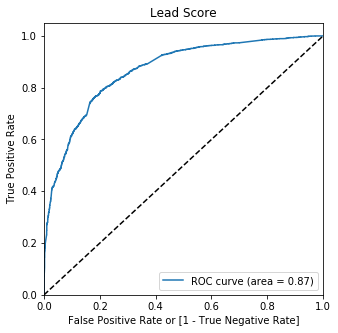

In [3042]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [3043]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.285972,8766,0,1,1,1,0,0,0,0,0,0,0
1,0,0.306542,148,0,1,1,1,1,0,0,0,0,0,0
2,1,0.936503,8146,1,1,1,1,1,1,1,1,1,1,1
3,1,0.534017,2782,1,1,1,1,1,1,1,0,0,0,0
4,1,0.995086,6309,1,1,1,1,1,1,1,1,1,1,1


In [3044]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481352  1.000000  0.000000
0.1   0.1  0.557470  0.989126  0.156854
0.2   0.2  0.702508  0.951971  0.470984
0.3   0.3  0.768375  0.874037  0.670311
0.4   0.4  0.783860  0.816493  0.753574
0.5   0.5  0.791930  0.759855  0.821699
0.6   0.6  0.769466  0.648845  0.881413
0.7   0.7  0.743293  0.552333  0.920521
0.8   0.8  0.717775  0.463978  0.953322
0.9   0.9  0.657579  0.304486  0.985282


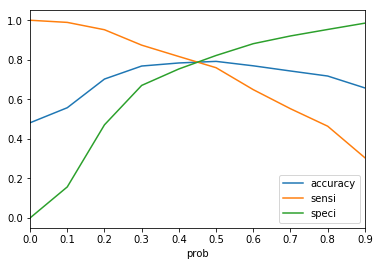

In [3045]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [3046]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.285972,8766,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.306542,148,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.936503,8146,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.534017,2782,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.995086,6309,1,1,1,1,1,1,1,1,1,1,1,1


In [3047]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7869138495092693

In [3048]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1828,  550],
       [ 427, 1780]], dtype=int64)

In [3049]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [3050]:
# Let's see the sensitivity of our logistic regression model
print("Senstivity",TP / float(TP+FN))
# Let us calculate specificity
print("Specificity",TN / float(TN+FP))
# Calculate false postive rate - predicting converted when customer does not  converted
print("False postive rate",FP/ float(TN+FP))
# positive predictive value 
print ("Positive predictive value ",TP / float(TP+FP))
# Negative predictive value
print ("Negative predictive value",TN / float(TN+ FN))

Senstivity 0.8065246941549615
Specificity 0.768713204373423
False postive rate 0.23128679562657695
Positive predictive value  0.7639484978540773
Negative predictive value 0.8106430155210643


In [3051]:
print("Precision score",precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("Recall score",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision score 0.7981913374583531
Recall score 0.7598550067965564


In [3052]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

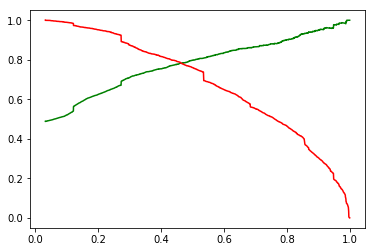

In [3053]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making predictions on the test set

In [3054]:
X_test[['TotalVisits', 'TotTimeSpentonWebsite', 'PageViewsPerVisit']] = scaler.transform(
    X_test[['TotalVisits', 'TotTimeSpentonWebsite', 'PageViewsPerVisit']])

In [3055]:

# Creating X_test_new dataframe by dropping variables from X_test
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

C:\Users\VJT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,DontMail,TotalVisits,TotTimeSpentonWebsite,PageViewsPerVisit,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Welingak Website,LastActivity_SMS Sent,CurrentOccupation_Working Professional,LastNotableActivity_Modified,LastNotableActivity_Unreachable
5966,1.0,0,0.026087,0.112236,0.054545,0,0,0,1,0,0,0
152,1.0,1,0.017391,0.102993,0.018182,0,1,0,0,0,1,0
5132,1.0,0,0.052174,0.078345,0.027273,0,0,0,0,0,0,0
5308,1.0,0,0.104348,0.062500,0.072727,0,1,0,0,0,0,0
5021,1.0,0,0.017391,0.554577,0.036364,0,0,0,1,0,0,0


In [3056]:
X_test_sm = sm.add_constant(X_test_new)

In [3057]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

5966    0.545007
152     0.023560
5132    0.332024
5308    0.149531
5021    0.891350
8191    0.854296
8389    0.292102
417     0.148647
6879    0.988417
3513    0.337497
dtype: float64

In [3058]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
5966,0.545007
152,0.023560
5132,0.332024
5308,0.149531
5021,0.891350


In [3059]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [3060]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [3061]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,CustID,0
0,0,5966,0.545007
1,0,152,0.023560
2,0,5132,0.332024
3,0,5308,0.149531
4,1,5021,0.891350


In [3062]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [3063]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Converted_Prob'], axis=1)

C:\Users\VJT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


In [3064]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,5966,0,0.545007
1,152,0,0.023560
2,5132,0,0.332024
3,5308,0,0.149531
4,5021,1,0.891350


In [3065]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted
0,5966,0,0.545007,1
1,152,0,0.023560,0
2,5132,0,0.332024,0
3,5308,0,0.149531,0
4,5021,1,0.891350,1


In [3066]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7801526717557252

In [3067]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[771, 210],
       [222, 762]], dtype=int64)

In [3068]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [3069]:
# Let's see the sensitivity of our logistic regression model
print("Senstivity",TP / float(TP+FN))
# Let us calculate specificity
print("Specificity",TN / float(TN+FP))
# Calculate false postive rate - predicting converted when customer does not  converted
print("False postive rate",FP/ float(TN+FP))
# positive predictive value 
print ("Positive predictive value ",TP / float(TP+FP))
# Negative predictive value
print ("Negative predictive value",TN / float(TN+ FN))

print("Precision score",precision_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("Recall score",recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Senstivity 0.774390243902439
Specificity 0.7859327217125383
False postive rate 0.21406727828746178
Positive predictive value  0.7839506172839507
Negative predictive value 0.7764350453172205
Precision score 0.7839506172839507
Recall score 0.774390243902439


##### As train and test data accuracy are evaluated. Same model is fitted with orginal dataset(combined train and test dataset)
##### to assign the computed lead score with respective ProspectID

In [3070]:
df_orginal[['TotalVisits', 'TotTimeSpentonWebsite', 'PageViewsPerVisit']] = scaler.transform(
    df_orginal[['TotalVisits', 'TotTimeSpentonWebsite', 'PageViewsPerVisit']])

In [3071]:
# Creating X_test_new dataframe by dropping variables from X_test
#X_train_new = X_train_new.drop('const',axis=1)
df_orginal = df_orginal[X_train_new.columns]

# Adding a constant variable 
df_orginal_sm = sm.add_constant(df_orginal)
df_orginal_sm.head()

C:\Users\VJT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,DontMail,TotalVisits,TotTimeSpentonWebsite,PageViewsPerVisit,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Welingak Website,LastActivity_SMS Sent,CurrentOccupation_Working Professional,LastNotableActivity_Modified,LastNotableActivity_Unreachable
0,1.0,0,0.000000,0.000000,0.000000,0,0,0,0,0,1,0
1,1.0,0,0.043478,0.296655,0.045455,0,0,0,0,0,0,0
2,1.0,0,0.017391,0.674296,0.036364,0,1,0,0,0,0,0
3,1.0,0,0.008696,0.134243,0.018182,0,1,0,0,0,1,0
4,1.0,0,0.017391,0.628521,0.018182,0,0,0,0,0,1,0


In [3072]:
#df_orginal_sm = sm.add_constant(df_orginal)

df_orginal_pred = res.predict(df_orginal_sm)
df_orginal_pred[:10]

0     0.120562
1     0.492468
2     0.668073
3     0.087089
4     0.611810
6     0.658614
10    0.581151
11    0.616993
12    0.320312
13    0.203614
dtype: float64

In [3073]:
# Converting y_pred to a dataframe which is an array
df_orginal_pred_1 = pd.DataFrame(df_orginal_pred)
# Let's see the head
df_orginal_pred_1.head()

,0
0,0.120562
1,0.492468
2,0.668073
3,0.087089
4,0.611810


In [3074]:
# Converting y_test to dataframe
df_orginal_df = pd.DataFrame(y)
# Putting ProspectId to index
df_orginal_df['ProspectID'] = df.ProspectID

In [3075]:
# Removing index for both dataframes to append them side by side 
df_orginal_pred_1.reset_index(drop=True, inplace=True)
df_orginal_df.reset_index(drop=True, inplace=True)

In [3076]:
df_orginal_df.head()

,Converted,ProspectID
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620
1,0,2a272436-5132-4136-86fa-dcc88c88f482
2,1,8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3,0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4,1,3256f628-e534-4826-9d63-4a8b88782852


In [3077]:
df_orginal_df.head()

,Converted,ProspectID
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620
1,0,2a272436-5132-4136-86fa-dcc88c88f482
2,1,8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3,0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4,1,3256f628-e534-4826-9d63-4a8b88782852


In [3078]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([df_orginal_df, df_orginal_pred_1],axis=1)
y_pred_final.head()

,Converted,ProspectID,0
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0.120562
1,0,2a272436-5132-4136-86fa-dcc88c88f482,0.492468
2,1,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0.668073
3,0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0.087089
4,1,3256f628-e534-4826-9d63-4a8b88782852,0.611810


In [3079]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ProspectID','Converted','Converted_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

C:\Users\VJT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """


,ProspectID,Converted,Converted_Prob
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.120562
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0.492468
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,0.668073
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0.087089
4,3256f628-e534-4826-9d63-4a8b88782852,1,0.611810


In [3080]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,ProspectID,Converted,Converted_Prob,final_predicted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.120562,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0.492468,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,0.668073,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0.087089,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,0.611810,1


In [3081]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[2599,  760],
       [ 649, 2542]], dtype=int64)

In [3082]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [3083]:
# Let's see the sensitivity of our logistic regression model
print("Senstivity",TP / float(TP+FN))
# Let us calculate specificity
print("Specificity",TN / float(TN+FP))
# Calculate false postive rate - predicting converted when customer does not  converted
print("False postive rate",FP/ float(TN+FP))
# positive predictive value 
print ("Positive predictive value ",TP / float(TP+FP))
# Negative predictive value
print ("Negative predictive value",TN / float(TN+ FN))

print("Precision score",precision_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("Recall score",recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Senstivity 0.7966154810404262
Specificity 0.7737421851741589
False postive rate 0.22625781482584104
Positive predictive value  0.7698364627498486
Negative predictive value 0.8001847290640394
Precision score 0.7698364627498486
Recall score 0.7966154810404262


In [3084]:
y_pred_final.shape[0]

6550

##### Lead score is found by multiplied conversio probability with 100

In [3085]:
y_pred_final['LeadScore'] =round(y_pred_final.Converted_Prob*100)


In [3086]:
y_pred_final.head()

,ProspectID,Converted,Converted_Prob,final_predicted,LeadScore
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.120562,0,12.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0.492468,1,49.0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,0.668073,1,67.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0.087089,0,9.0
4,3256f628-e534-4826-9d63-4a8b88782852,1,0.611810,1,61.0


In [3087]:
y_pred_final.shape[0]

6550

##### LeadScore is combined with each lead 

In [3088]:
df_LeadScore =df.merge(y_pred_final,on ='ProspectID')

In [3089]:
df_LeadScore.drop(['Converted_y','Converted_Prob','final_predicted'],inplace =True,axis =1)

In [3090]:
df_LeadScore.head()

,ProspectID,DontMail,Converted_x,TotalVisits,TotTimeSpentonWebsite,PageViewsPerVisit,FreeCopyMasteringTheInterview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,...,LastNotableActivity_Email Received,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked,LeadScore
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,12.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49.0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,67.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,9.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,61.0


##### Displaying Lead score for the corresponding ProspectId

In [3091]:
df_LeadScore[['ProspectID','LeadScore']].head()

,ProspectID,LeadScore
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,12.0
1,2a272436-5132-4136-86fa-dcc88c88f482,49.0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,67.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,9.0
4,3256f628-e534-4826-9d63-4a8b88782852,61.0


In [3092]:
y_pred_final.final_predicted.sum()/len(y_pred_final)

0.5041221374045801

In [3093]:
y_pred_final['IncreaseLeadConversion_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.14 else 0)
y_pred_final.head()

,ProspectID,Converted,Converted_Prob,final_predicted,LeadScore,IncreaseLeadConversion_predicted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.120562,0,12.0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0.492468,1,49.0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,0.668073,1,67.0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0.087089,0,9.0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,0.611810,1,61.0,1


##### Leadconverstion rate for 0.14 cutoff value is 80%

In [3094]:
y_pred_final.IncreaseLeadConversion_predicted.sum()/len(y_pred_final)

0.8009160305343511

##### Recommendation: Achieving 80% conversion rate is possible for  the cutoff value as 0.14